In [1]:
import numpy as np
import pandas as pd

import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
ff1.Cache.enable_cache('cache') 

In [3]:
quali = ff1.get_session(2021, 'British GP', 'Q')

In [5]:
quali.load(telemetry=True)

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has

In [7]:
driver_1, driver_2 = 'HAM', 'VER'
distance_min, distance_max = 4800, 5500 

In [14]:
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

telemetry_driver_1 = laps_driver_1.pick_fastest().get_car_data().add_distance()
telemetry_driver_2 = laps_driver_2.pick_fastest().get_car_data().add_distance()

team_driver_1 = laps_driver_1.reset_index().loc[0, 'Team']
team_driver_2 = laps_driver_2.reset_index().loc[0, 'Team']

In [15]:
telemetry_driver_1.loc[telemetry_driver_1['Brake'] > 0, 'CurrentAction'] = 'Brake'
telemetry_driver_1.loc[telemetry_driver_1['Throttle'] == 100, 'CurrentAction'] = 'Full Throttle'
telemetry_driver_1.loc[(telemetry_driver_1['Brake'] == 0) & (telemetry_driver_1['Throttle'] < 100), 'CurrentAction'] = 'Cornering'

telemetry_driver_2.loc[telemetry_driver_2['Brake'] > 0, 'CurrentAction'] = 'Brake'
telemetry_driver_2.loc[telemetry_driver_2['Throttle'] == 100, 'CurrentAction'] = 'Full Throttle'
telemetry_driver_2.loc[(telemetry_driver_2['Brake'] == 0) & (telemetry_driver_2['Throttle'] < 100), 'CurrentAction'] = 'Cornering'

In [16]:
telemetry_driver_1['ActionID'] = (telemetry_driver_1['CurrentAction'] != telemetry_driver_1['CurrentAction'].shift(1)).cumsum()
telemetry_driver_2['ActionID'] = (telemetry_driver_2['CurrentAction'] != telemetry_driver_2['CurrentAction'].shift(1)).cumsum()

In [18]:
actions_driver_1 = telemetry_driver_1[['ActionID', 'CurrentAction', 'Distance']].groupby(['ActionID', 'CurrentAction']).max('Distance').reset_index()
actions_driver_2 = telemetry_driver_2[['ActionID', 'CurrentAction', 'Distance']].groupby(['ActionID', 'CurrentAction']).max('Distance').reset_index()

actions_driver_1['Driver'] = driver_1
actions_driver_2['Driver'] = driver_2

In [20]:
actions_driver_1['DistanceDelta'] = actions_driver_1['Distance'] - actions_driver_1['Distance'].shift(1)
actions_driver_1.loc[0, 'DistanceDelta'] = actions_driver_1.loc[0, 'Distance']

actions_driver_2['DistanceDelta'] = actions_driver_2['Distance'] - actions_driver_2['Distance'].shift(1)
actions_driver_2.loc[0, 'DistanceDelta'] = actions_driver_2.loc[0, 'Distance']

In [23]:
all_actions = actions_driver_1.append(actions_driver_2)
all_actions

,ActionID,CurrentAction,Distance,Driver,DistanceDelta
0,1,Full Throttle,785.631944,HAM,785.631944
1,2,Brake,889.831944,HAM,104.200000
2,3,Cornering,961.844444,HAM,72.012500
3,4,Brake,1016.880000,HAM,55.035556
4,5,Cornering,1081.413333,HAM,64.533333
5,6,Full Throttle,1838.406667,HAM,756.993333
6,7,Brake,1963.740278,HAM,125.333611
7,8,Cornering,2040.406944,HAM,76.666667
8,9,Full Throttle,2067.095833,HAM,26.688889
9,10,Brake,2111.007500,HAM,43.911667


In [27]:
avg_speed_driver_1 = np.mean(telemetry_driver_1['Speed'].loc[
    (telemetry_driver_1['Distance'] >= distance_min) & 
        (telemetry_driver_1['Distance'] <= distance_max) 
])


avg_speed_driver_2 = np.mean(telemetry_driver_2['Speed'].loc[
    (telemetry_driver_2['Distance'] >= distance_min) & 
        (telemetry_driver_2['Distance'] <= distance_max) 
])

if avg_speed_driver_1 > avg_speed_driver_2:    
    speed_text = f"{driver_1} {round(avg_speed_driver_1 - avg_speed_driver_2,2)}km/h faster"
else:
    speed_text = f"{driver_2} {round(avg_speed_driver_2 - avg_speed_driver_1,2)}km/h faster"

speed_text

'HAM 2.0km/h faster'

(4800.0, 5500.0)

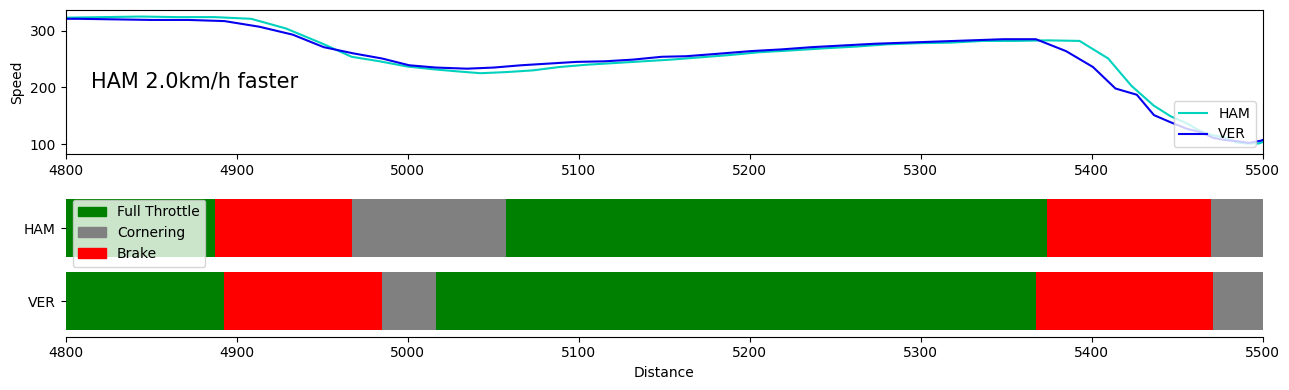

In [29]:
plt.rcParams["figure.figsize"] = [13, 4]
plt.rcParams["figure.autolayout"] = True

telemetry_colors = {
    'Full Throttle': 'green',
    'Cornering': 'grey',
    'Brake': 'red',
}

fig, ax = plt.subplots(2)


# Lineplot for speed 

ax[0].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[0].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))

# Speed difference
ax[0].text(distance_min + 15,200, speed_text, fontsize = 15)

ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")


# Horizontal barplot for telemetry

for driver in [driver_1, driver_2]:
    driver_actions = all_actions.loc[all_actions['Driver'] == driver]
    
    previous_action_end = 0
    for _, action in driver_actions.iterrows():
        ax[1].barh(
            [driver], 
            action['DistanceDelta'], 
            left=previous_action_end, 
            color=telemetry_colors[action['CurrentAction']]
        )
        
        previous_action_end = previous_action_end + action['DistanceDelta']
        
# Set x-label
plt.xlabel('Distance')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)

# Add legend
labels = list(telemetry_colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=telemetry_colors[label]) for label in labels]
ax[1].legend(handles, labels)

# Zoom in on the specific part we want to see
ax[0].set_xlim(distance_min, distance_max)
ax[1].set_xlim(distance_min, distance_max)